_Lambda School Data Science_

# Join datasets

Objectives
- concatenate data with pandas
- merge data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Combine Data Sets: Standard Joins
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-03-26 23:01:04--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.96.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.96.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.8’

instacart_online_gr 100%[===================>] 196.03M  96.1MB/s    in 2.0s    

2019-03-26 23:01:06 (96.1 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.8’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv # linux way

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


## Goal: Reproduce this example

The first two orders for user id 1:

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example) #show that image, so I can check it through out my coding

## Load data

Here's a list of all six CSV filenames

For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [0]:
import pandas as pd
aisles = pd.read_csv('aisles.csv')

In [38]:
aisles.shape

(134, 2)

In [0]:
aisles.head()

Aisles doesnt have any columns we need

### departments

In [0]:
departments = pd.read_csv('departments.csv')

In [41]:
departments.shape

(21, 2)

In [42]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


departments does not have any columns we need

### order_products__prior

In [0]:
order_products_prior = pd.read_csv('order_products__prior.csv')

In [15]:
order_products_prior.shape

(32434489, 4)

In [16]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
display(example)

In [18]:
order_products_prior.groupby('order_id')['product_id'].count() #returns how many products were in each one
order_products_prior.groupby('order_id')['product_id'].count().mean() #gives the average of all these numbers 
#10 products per order on average

10.088883421247614

Order Products Prior has 

-order_id

-product-id

-add_to_cart_order 




### order_products__train

In [0]:
order_products_train = pd.read_csv('order_products__train.csv')

In [20]:
order_products_train.shape

(1384617, 4)

In [0]:
order_products_train.head()

In [0]:
display(example)

Order Products Prior and Order Products Train have the exact same columns

### orders

In [0]:
orders = pd.read_csv('orders.csv')

In [24]:
orders.shape

(3421083, 7)

In [0]:
orders.head()

Orders has 

-user id

-Order id

-order number

-order dow

-order hour of day

### products

In [0]:
products = pd.read_csv('products.csv')

In [27]:
products.shape

(49688, 4)

In [0]:
products.head()

products has 

-product id

-product name

## Concatenate order_products__prior and order_products__train

In [0]:
order_products = pd.concat([order_products_prior, order_products_train])

In [30]:
order_products.shape, order_products_prior.shape, order_products_train.shape

((33819106, 4), (32434489, 4), (1384617, 4))

In [0]:
len(order_products) == len(order_products_prior) + len(order_products_train) #or
assert len(order_products) == len(order_products_prior) + len(order_products_train) #it passes because this assertion is true

In [0]:
assert (len(order_products.columns) == len(order_products_prior.columns) == len(order_products_train.columns))

In [33]:
rows, columns = order_products.shape
print('rows', rows)
print('columns', columns)

rows 33819106
columns 4


In [0]:
a_rows, a_columns = order_products_prior.shape
b_rows, b_columns = order_products_train.shape
c_rows, c_columns = order_products.shape

assert a_columns == b_columns == c_columns
assert a_rows == b_rows == c_rows #figure this out

In [0]:
order_products.head(), order_products_prior.head(), order_products_train.head()

In [0]:
condition = order_products['order_id']==2539329
order_products[condition]

## Get a subset of orders — the first two orders for user id 1

From 'orders' dataframe 

-user id

-order id

-order number

-order dow

-order hour of day

In [0]:
orders.head()

In [0]:
# Set a condtion
#we are assuming that the order number is orderd 
#assuming one row per order
orders[orders['user_id']==1].head(2) #[:2]Would work as well instead of head
orders[(orders['user_id']==1) & (orders['order_number']<=2)] #specifying multiple conditions in pandas
#for condtions, make sure you surround them with parenthesis 

condition = (orders['user_id']==1) & (orders['order_number']<=2)
#orders[condition]
columns= ['user_id', 
          'order_id', 
         'order_number',
         'order_dow',
         'order_hour_of_day']#this is how you specify the columns you would like to use

subset = orders.loc[condition, columns] #assign this to a new variable so I can easily use this group later 

In [0]:
subset.head()

In [0]:
display(example)

## Merge dataframes

Merge the subset from orders wuth columns from order products

In [0]:
orders.head()

In [0]:
#another way
columns = ['order_id', 'add_to_cart_order', 'product_id']

#merged = pd.merge(subset,
          #order_products[['order_id', 'add_to_cart_order', 'product_id']]) #.head()yes thats wht i want.now i want to merge
mergey = pd.merge(subset, order_products[columns],
                 how='inner', on='order_id')

In [0]:
subset.shape, order_products.shape, mergey.shape

In [0]:
mergey.head()

In [0]:
order_products.head()

In [0]:
subset.head()

merge wih columns from products

In [0]:
final = pd.merge(mergey, products[['product_id', 'product_name']],
                how='inner', on='product_id')

In [0]:
mergey.shape, products[['product_id', 'product_name']].shape, final.shape

In [0]:
final = final.sort_values(by=['order_number', 'add_to_cart_order'])

In [0]:
#final = final.rename(columns={'user_id': 'user id',}) to restyle the col names
[column for column in final] #shows col names 
final.columns = [column.replace('_', ' ') for column in final] #switched underscore for spaces

In [0]:
final.head()

Sort within a sort, 

sort by the primary, sort by secondary with in primary, sort by terinary by secondary and on and on and on

Follow the same process think about what col, which dataframe have them, then merge them 

You will need to redo the merge(same concepts, not in lecture)

Use Pandas Functions from the previous lesson(in second half) to get counts (value counts perhaps)

# Assignment

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Stretch challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

## **What Data Frames I Think I  Need:**

*   Products 
*   Orders
*   Order Products 


In [0]:
products = pd.read_csv('products.csv')

In [44]:
# Now I can see everything contained in Products
# Looks like I will need ['product_id'] & ['product_name']
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


**The Products Columns  I will use: **

*  product_id
*  product_name

In [0]:
orders = pd.read_csv('orders.csv')

In [45]:
# The Assignment asks how many times each item was ordered
# Maybe [order_id] & [order_number]
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


**The Order Columns I will (Maybe) Use:**

*  order_id
*  order_number

In [46]:
order_products = pd.concat([order_products_prior, order_products_train])

order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


## Merge The DataFrames

In [47]:
# Merging Order Products and Products
new_list = pd.merge(order_products, products)

# Verify
new_list.shape

(33819106, 7)

In [48]:
# Too much going on in the column area, will drop a few
new_list.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [49]:
# Dropped the columns that did not apply
new_df = new_list[['product_id', 'product_name']] 
new_df.head()

,product_id,product_name
0,33120,Organic Egg Whites
1,33120,Organic Egg Whites
2,33120,Organic Egg Whites
3,33120,Organic Egg Whites
4,33120,Organic Egg Whites


## **Top 10 Most Frequently Ordered Items**

In [53]:
# Calculating
top_10 = new_df['product_name'].value_counts()

print("\n----------- Top 10 Items Ordered From Instacart -----------\n")
print(top_10[:10])




----------- Top 10 Items Ordered From Instacart -----------

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64


**Note: What I really wanted to do for this was put all of this information in a DataFrame. I spent WAY too long messing around with that. **

**Here is a Bar Plot **

I am visually frusterated with my DataFrame 

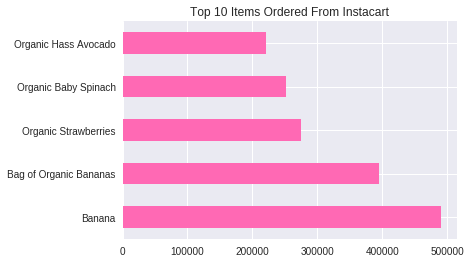

In [56]:
%matplotlib inline

(new_df['product_name']
 .value_counts()
 .head()
 .plot
 .barh(color='hotpink',
      title= 'Top 10 Items Ordered From Instacart'));